In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [114]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=6000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [115]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [5]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

### Общий набор переменных

In [172]:
# шаг стохастического градиентного спуска
eta = 1
# максимальное число итераций
max_iter = 1e5
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-7
# скорость обучения градиентного спуска
lr = 0.0001

### Стохастический градиентный спуск

In [159]:
def my_SGD(data, eta, min_weight_dist, max_iter):
    w = np.zeros(2)
# список векторов весов после каждой итерации
    w_list = [w.copy()]
# зададим начальную разницу весов большим числом
    weight_dist = np.inf
# список значений ошибок после каждой итерации
    errors = []
# счетчик итераций
    iter_num = 0
    np.random.seed(1234)
# ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])
    
        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска за {iter_num} операций, функционал ошибки составляет {round(errors[-1], 4)}, веса {w_list[-1]}')
    return errors

In [173]:
errors = my_SGD(data, eta, min_weight_dist, max_iter)

В случае использования стохастического градиентного спуска за 11318 операций, функционал ошибки составляет 30.4922, веса [23.98324728 80.2680665 ]


### Градиентный спуск

In [122]:
def my_gd(data, min_weight_dist, lr):
    n = data.shape[0]
    err_list=[]
    max_iter = 1e5
    err_pre = np.inf
    w = np.zeros(2)
    for i in range(int(max_iter)):
        y_pred = np.dot(data, w)
        w -= (lr * (1 / n * 2 * np.dot((y_pred - target), data)))
        err = mserror(data, w, target)
        err_list.append(err)
        if err_pre - err < min_weight_dist:
            print(f'# итерация: {i}, MSE: {err}, веса: {w}')
            return err_list
        err_pre = err

In [128]:
err_gd = my_gd(data, min_weight_dist, lr = 0.1)
print(coef)

# итерация: 59, MSE: 26.34737985509519, веса: [24.4163992 82.2529721]
[24.48366924 81.76631737]


### Сравнение градиентного и стохастического градиентного спуска

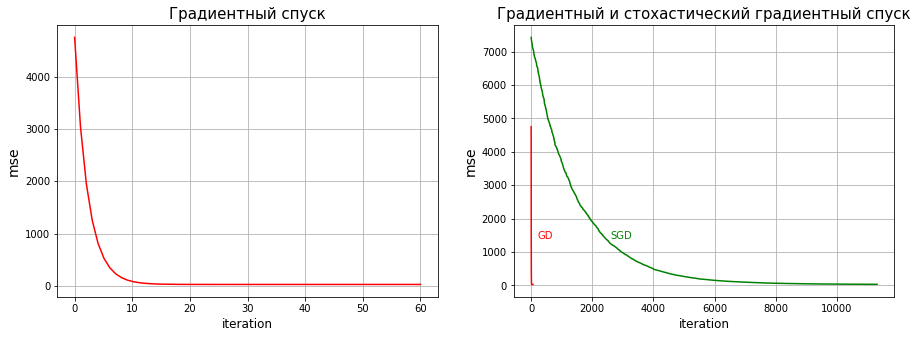

In [218]:
plt.figure(figsize=(15, 5))
x_gd = np.linspace(0, len(err_gd), num=len(err_gd))
x_sgd = np.linspace(0, len(errors), num=len(errors))
plt.subplot(1, 2, 1)
plt.plot(x_gd, err_gd, color='r', label = 'GD')
plt.xlabel('iteration', fontsize=12, color='black')
plt.ylabel('mse', fontsize=14, color='black')
plt.title('Градиентный спуск', fontsize=15)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x_gd, err_gd, color='r', label='GD')
plt.plot(x_sgd, errors, color='g', label='SGD')
plt.xlabel('iteration', fontsize=12, color='black')
plt.ylabel('mse', fontsize=14, color='black')
plt.text(200, 1400, 'GD', color='red')
plt.text(2600, 1400, 'SGD', color='green')
plt.title('Градиентный и стохастический градиентный спуск', fontsize=15)
plt.grid()
plt.show()


## Вывод

In [ ]:
Для выбранного примера (n_samples=6000, n_features = 2) простой градиентный спуск дает результат за меньшее число итераций

### Градиентный спуск c регуляризацией

In [ ]:
def my_gd_reg2(data, min_weight_dist, lr, lambda_ = 1):
    # Максимальное число итераций
    n = data.shape[0]
    err_list=[]
    max_iter = 1e5
    err_pre = np.inf
    w = np.zeros(2)
    for i in range(int(max_iter)):
        y_pred = np.dot(data, w)
        w -= (lr * (1 / n * 2 * np.dot((y_pred - target), data) + lambda_ * w))
        err = mserror(data, w, target)
        err_list.append(err)
        if err_pre - err < min_weight_dist:
            print(f'# итерация: {i}, MSE: {err}, веса: {w}')
            return err_list
        err_pre = err

In [220]:
my_gd_reg2(data, min_weight_dist, lr = 0.1, lambda_ = 1e-2)
print(coef)

# итерация: 84, MSE: 26.52864947545067, веса: [24.29892186 81.84501963]
[24.48366924 81.76631737]


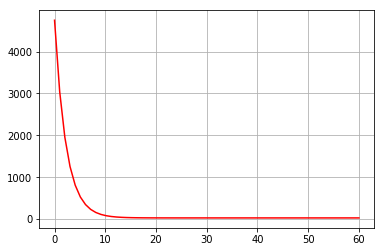

In [221]:
xx = np.linspace(0, len(err_gd), num=len(err_gd))
plt.plot(xx, err_gd, color='r')
plt.grid()
plt.show()

### Стохастический градиентный спуск c регуляризацией

In [342]:
def my_SGD_reg2(data, eta, min_weight_dist, max_iter, lambda_ = 1e-5):
    w = np.zeros(2)
# список векторов весов после каждой итерации
    w_list = [w.copy()]
# зададим начальную разницу весов большим числом
    weight_dist = np.inf
# список значений ошибок после каждой итерации
    errors = []

# счетчик итераций
    iter_num = 0

    np.random.seed(1234)
    new_w = w

# ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])
    
        new_w = w - 2 * eta * (np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) + lambda_ * new_w) / target.shape[0]
        
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
        if iter_num % 5000 == 0:
            print(f'# итерация: {iter_num}, MSE: {errors[iter_num-1]}, веса: {new_w}')
    
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска за {iter_num} операций, функционал ошибки составляет {round(errors[-1], 4)}, веса {w_list[-1]}')

In [343]:
eta = 1
min_weight_dist = 1e-6
my_SGD_reg2(data, eta, min_weight_dist, max_iter, lambda_ = 1e-4)
print(coef)

# итерация: 5000, MSE: 265.29219472626374, веса: [19.8424096  67.53222891]
# итерация: 10000, MSE: 36.51251372916994, веса: [23.66462011 79.16207503]
В случае использования стохастического градиентного спуска за 12783 операций, функционал ошибки составляет 27.8556, веса [24.09572547 81.07074391]
[24.48366924 81.76631737]
